## IMAGE CLASSIFICATION WITH LOGISTIC REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import os
# Running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
print(os.listdir("./input"))

['images']


In [2]:
train_messy = "./input/images/train/messy"
train_clean= "./input/images/train/clean"
test_messy= "./input/images/val/messy"
test_clean= "./input/images/val/clean"
image_size = 128

### A Messy Room

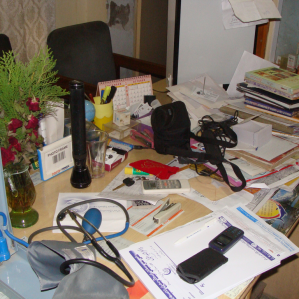

In [3]:
Image.open("./input/images/train/messy/73.png")

### A Clean Room

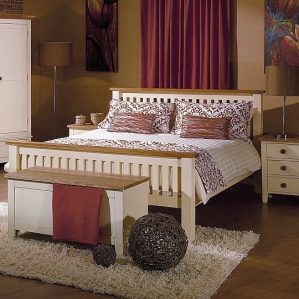

In [4]:
Image.open("./input/images/train/clean/73.png")

In [5]:
# train_messy now refers to a path
# listdir shows all the files in the path
# os.listdir(train_messy)

100%|█████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 261.56it/s]


Text(0.5, 1.0, 'Messy and Clean Rooms in GrayScale')

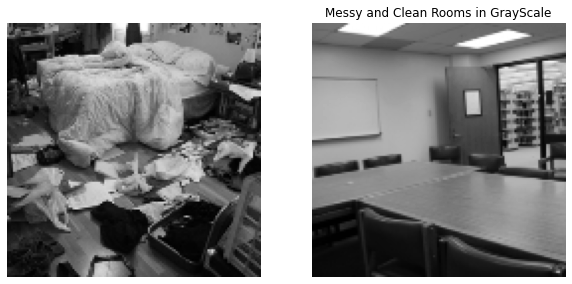

In [6]:
#  Tqdm in a short for taqadum in arabic, which means progress.
for image in tqdm(os.listdir(train_messy)): 
    # cv2 requires path of image.
    # os.path.join is used to get path of each image using for loop
    # It appends name of each image to path of folder of image
    path = os.path.join(train_messy, image)
    # array([145,  41,  88, ...,  80,  45,  17], dtype=uint8) # numpy.ndarray
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    # convert 2D to 1d
    img = cv2.resize(img, (image_size, image_size)).flatten()  
    # array([145,  41,  88, ...,  80,  45,  17], dtype=uint8) # numpy.ndarray
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_clean)): 
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size), cmap='gray')
plt.axis('off')
plt.title("Messy and Clean Rooms in GrayScale")

In [7]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1)
    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data 

In [8]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in tqdm(os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data 

In [9]:
train_data = train_data() 
test_data = test_data()

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 222.82it/s]


In [10]:
# train_data has 96 messy and 96 clean
# test_data has 10 messy and 10 clean
# x_data is 96M + 96C + 10M + 10C
x_data=np.concatenate((train_data,test_data),axis=0)
# Normalize between 0 and 1
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [11]:
# x_data has 212 rows and each element is 128 * 128
x_data.shape

(212, 128, 128)

In [12]:
# 1=> messy 0=> clean
# z1 has 96 zeroes in 1D array # numpy.ndarray
z1 = np.zeros(96)
# o1 has 96 ones in 1D array # numpy.ndarray
o1 = np.ones(96)
# Y_train is 1D array of 192 elements; 96M + 96C 
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
# y_test is 1D array of 192 elements; 10M + 10C 
Y_test = np.concatenate((o, z), axis=0)

In [13]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [14]:
# y_data has 212 rows
y_data.shape

(212, 1)

In [15]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 128, 128)
Y shape:  (212, 1)


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142, 128, 128), (70, 128, 128), (142, 1), (70, 1))

In [18]:
x_train.shape[0], x_train.shape[1], x_train.shape[2]

(142, 128, 128)

In [19]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (142, 16384)
X test flatten (70, 16384)


In [20]:
x_train_flatten

array([[0.38823529, 0.45882353, 0.49411765, ..., 0.16078431, 0.1372549 ,
        0.1372549 ],
       [0.41568627, 0.42352941, 0.38823529, ..., 0.14117647, 0.14117647,
        0.12941176],
       [0.89411765, 0.89411765, 0.89411765, ..., 0.12156863, 0.01568627,
        0.01568627],
       ...,
       [0.20784314, 0.22745098, 0.51764706, ..., 0.8745098 , 0.8745098 ,
        0.88235294],
       [0.80392157, 0.81176471, 0.81176471, ..., 0.31764706, 0.32156863,
        0.30588235],
       [0.75686275, 0.76470588, 0.76470588, ..., 0.70588235, 0.71372549,
        0.72941176]])

In [21]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 142)
x test:  (16384, 70)
y train:  (1, 142)
y test:  (1, 70)


## LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
x_train = x_train_flatten
x_test = x_test_flatten
y_test = y_test.T
y_train = y_train.T

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((142, 16384), (142, 1), (70, 16384), (70, 1))

In [29]:
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
model.score(x_test, y_test)

0.7

In [31]:
ans = model.predict(x_test[:10])

In [32]:
ans

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
ans = list(map(lambda x: "Messy" if x else "Clean", ans))

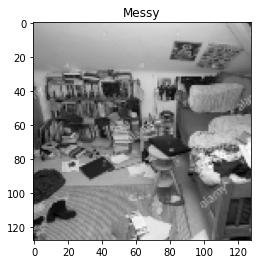

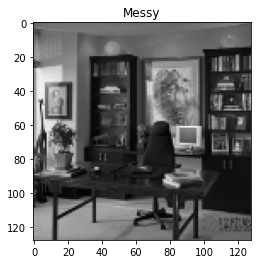

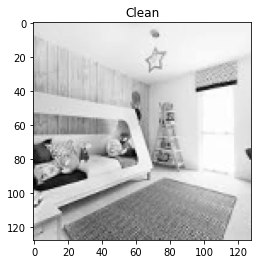

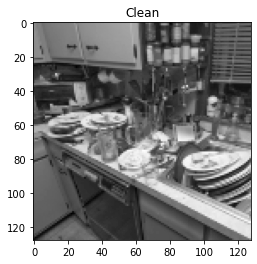

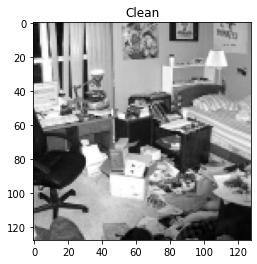

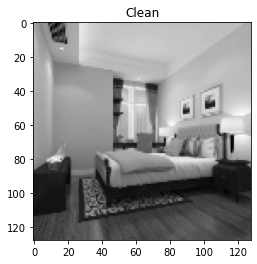

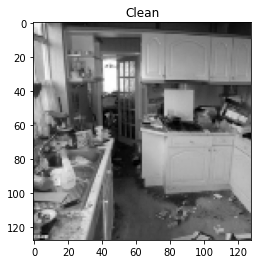

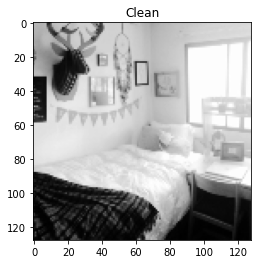

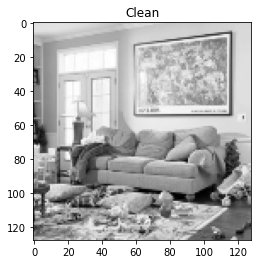

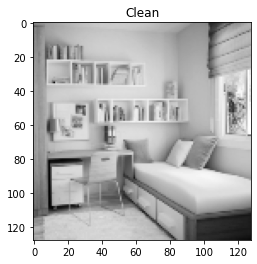

In [34]:
for i in range(len(ans)):
    plt.imshow(x_test[i].reshape(128, 128), cmap='gray')
    plt.title(ans[i])
    plt.show()